In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import OneHotEncoder 
from sklearn.cluster import KMeans

In [28]:
train = pd.read_csv("Insurance_Marketing-Customer-Value-Analysis (1).csv")
data= pd.read_csv("file3.csv")
train.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335


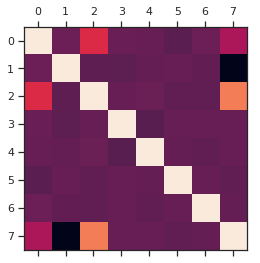

In [29]:
plt.matshow(train.corr())
train.corr().head()

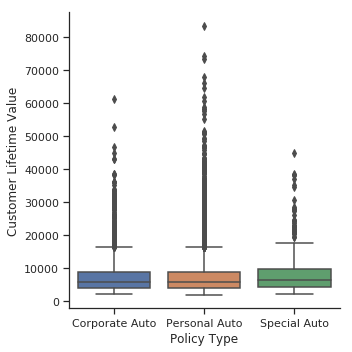

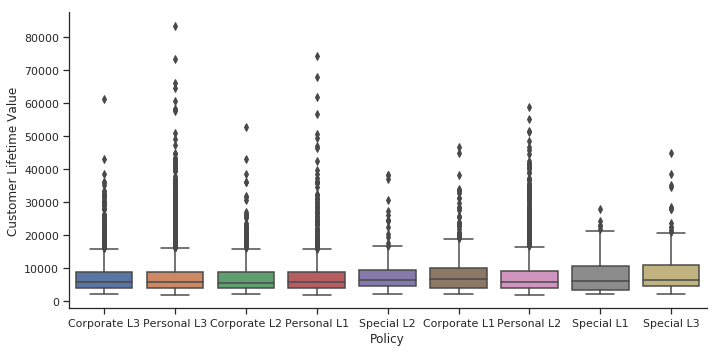

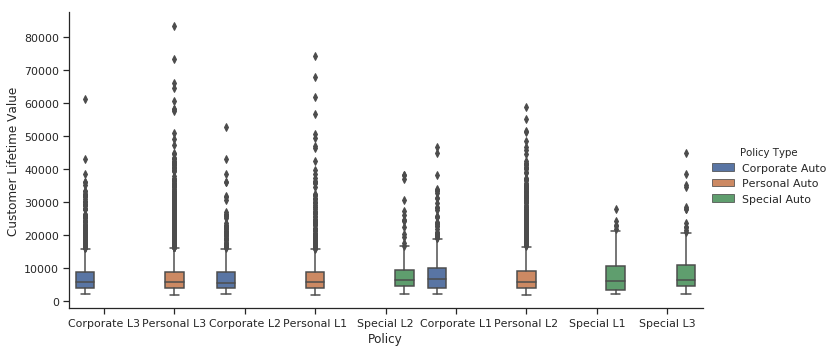

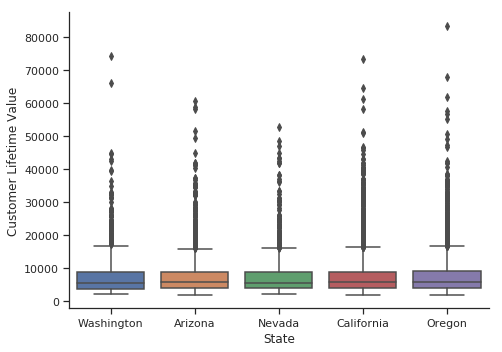

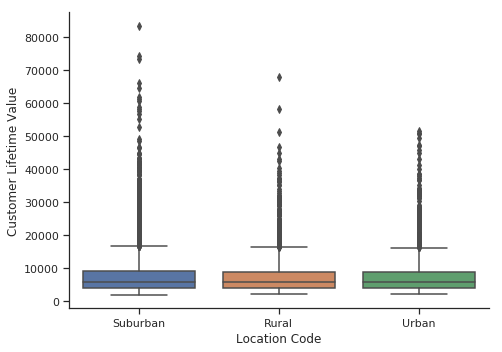

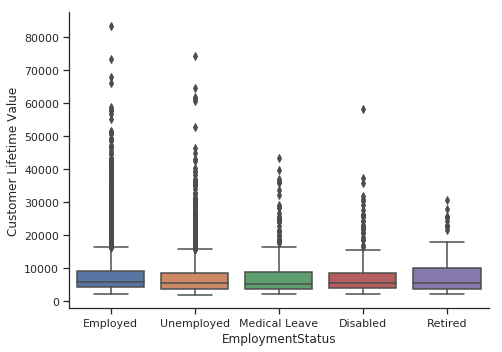

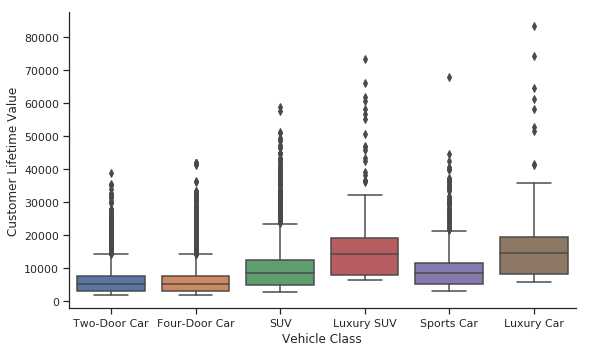

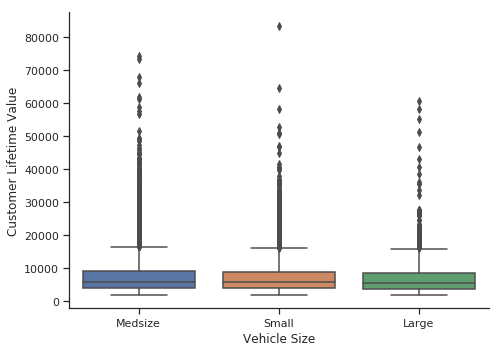

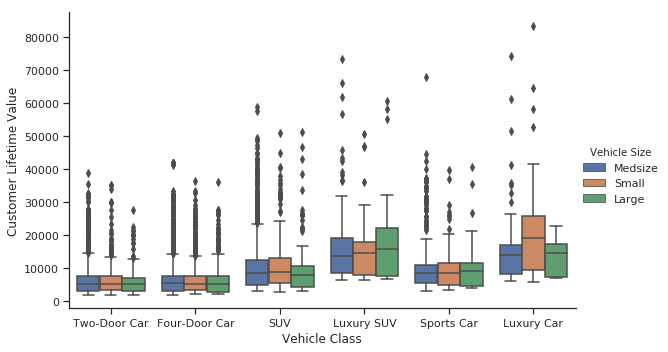

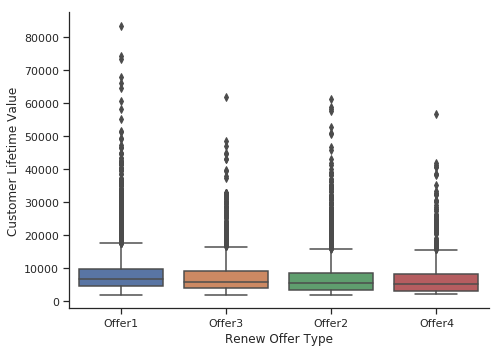

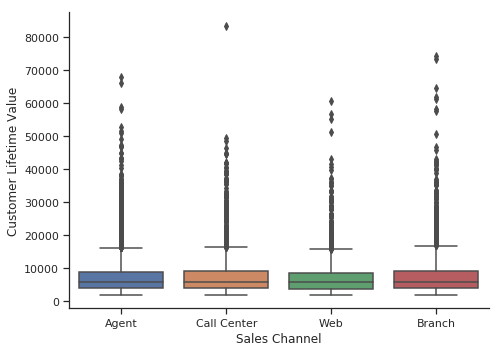

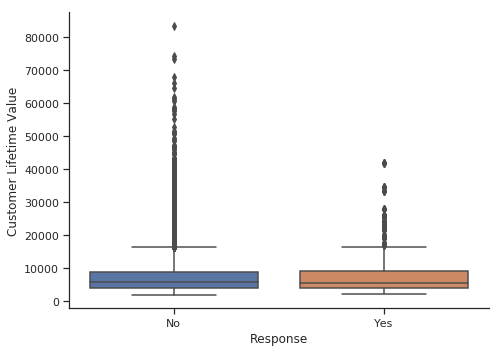

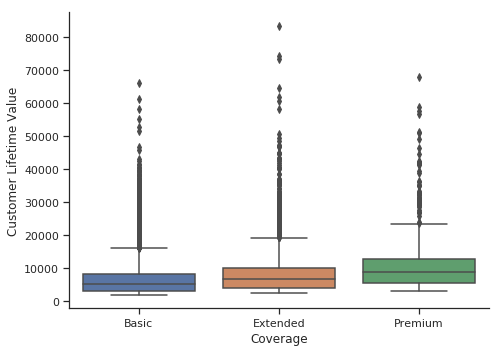

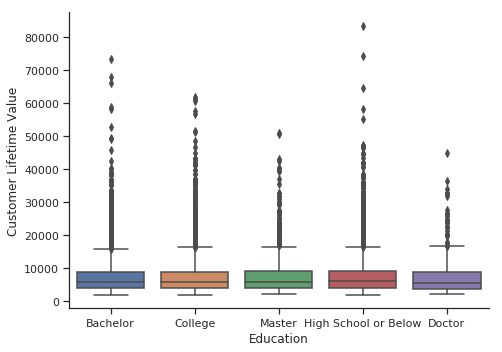

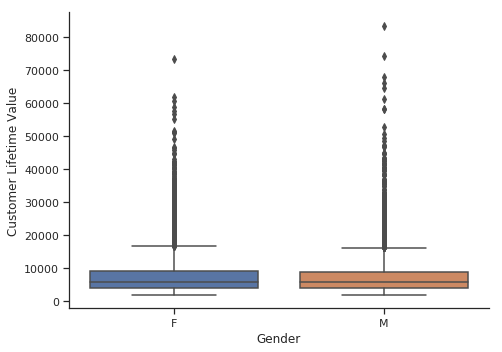

In [30]:
sns.catplot(x="Policy Type", y="Customer Lifetime Value", kind="box", data=train)
sns.catplot(x="Policy", y="Customer Lifetime Value", kind="box", data=train, aspect=16.7/8.27)
sns.catplot(x="Policy", y="Customer Lifetime Value",hue="Policy Type", kind="box", data=train, aspect=16.7/8.27)
sns.catplot(x="State", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Location Code", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="EmploymentStatus", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Vehicle Class", y="Customer Lifetime Value", kind="box", data=train, aspect=13.7/8.27) 
sns.catplot(x="Vehicle Size", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Vehicle Class", y="Customer Lifetime Value", hue="Vehicle Size", kind="box", data=train, aspect=13.7/8.27) 
sns.catplot(x="Renew Offer Type", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Sales Channel", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Response", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Coverage", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Education", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)
sns.catplot(x="Gender", y="Customer Lifetime Value", kind="box", data=train, aspect=11.7/8.27)


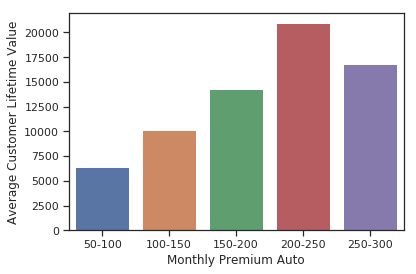

In [31]:
x1=train["Monthly Premium Auto"].between(50, 100, inclusive=False)
x2=train["Monthly Premium Auto"].between(100, 150, inclusive=False)
x3=train["Monthly Premium Auto"].between(150, 200, inclusive=False)
x4=train["Monthly Premium Auto"].between(200, 250, inclusive=False)
x5=train["Monthly Premium Auto"].between(250, 300, inclusive=False)
x11=train["Customer Lifetime Value"][x1==True].mean()
x12=train["Customer Lifetime Value"][x2==True].mean()
x13=train["Customer Lifetime Value"][x3==True].mean()
x14=train["Customer Lifetime Value"][x4==True].mean()
x15=train["Customer Lifetime Value"][x5==True].mean()
x_sort=[x11,x12,x13,x14,x15]
x_val=["50-100","100-150","150-200","200-250","250-300"]
ax = sns.barplot(x=x_val,y=x_sort)
ax.set(xlabel='Monthly Premium Auto', ylabel='Average Customer Lifetime Value')
plt.show()

([0, 1, 2], <a list of 3 Text xticklabel objects>)

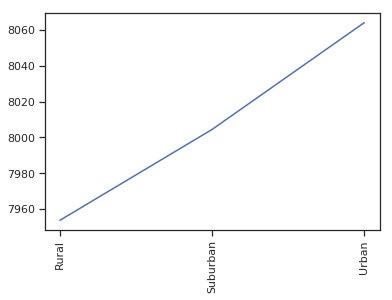

In [32]:
p2=train.groupby(train['Location Code'])['Customer Lifetime Value'].mean()
plt.plot(p2)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

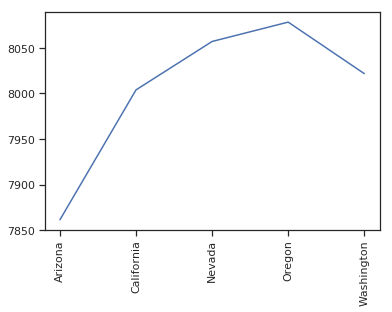

In [33]:
p3=train.groupby(train['State'])['Customer Lifetime Value'].mean()
plt.plot(p3)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

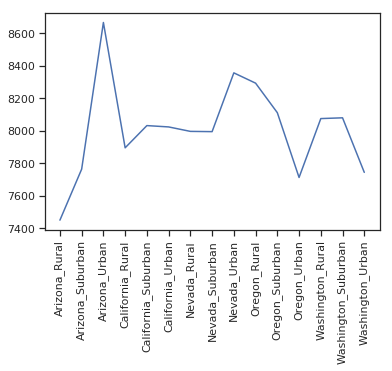

In [35]:
px=train['State']+"_"+train['Location Code']
p1=train.groupby(px)['Customer Lifetime Value'].mean()
h1=plt.plot(p1)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

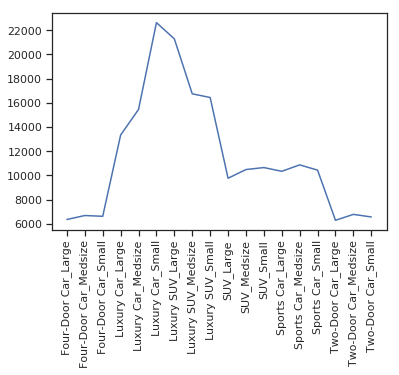

In [38]:
p=train["Vehicle Class"]+"_"+train["Vehicle Size"]
p=train.groupby(p)['Customer Lifetime Value'].mean()
h1=plt.plot(p)
plt.xticks(rotation=90)

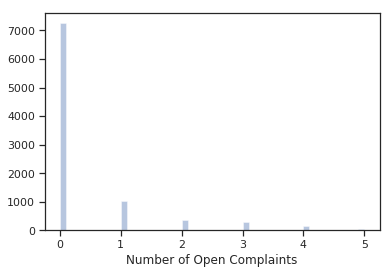

In [43]:
sns.distplot(data["Number of Open Complaints"],kde = False)

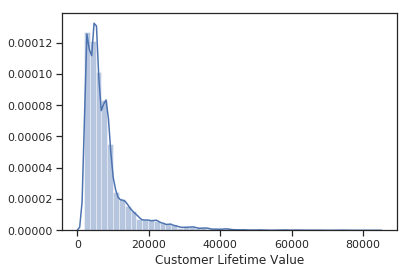

In [44]:
sns.distplot(data["Customer Lifetime Value"])

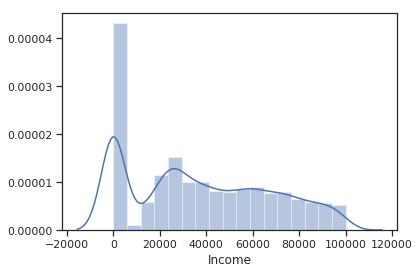

In [46]:
sns.distplot(data["Income"])

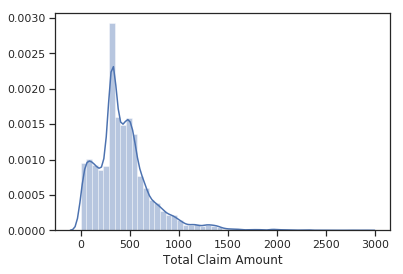

In [47]:
sns.distplot(data["Total Claim Amount"])

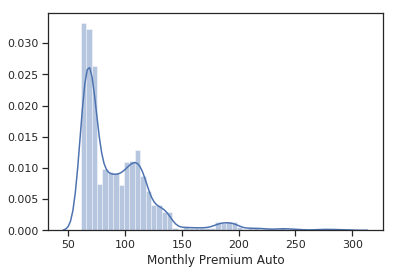

In [48]:
sns.distplot(data["Monthly Premium Auto"])

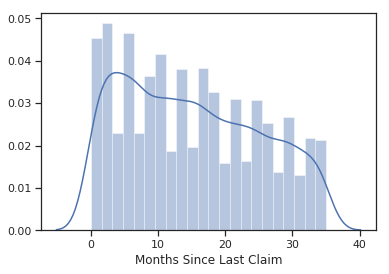

In [49]:
sns.distplot(data["Months Since Last Claim"])

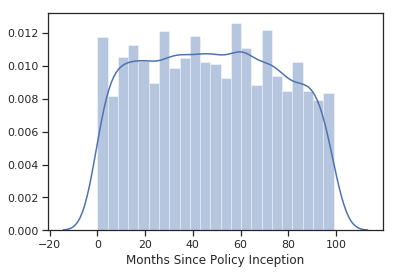

In [50]:
sns.distplot(data["Months Since Policy Inception"])

In [52]:
new_data = data[data.columns]
new_data=new_data.drop(['Customer Lifetime Value'],axis=1)
X = new_data
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y ,test_size=0.2)


Text(0.5, 0, 'Cube root transformation')

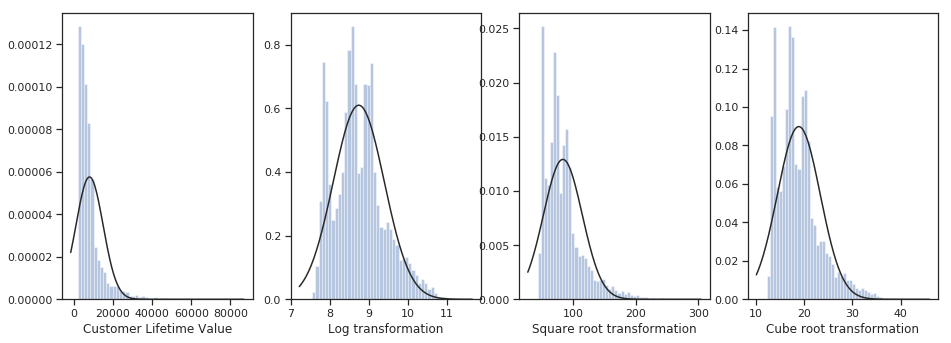

In [53]:
from scipy.stats import norm
from matplotlib import pyplot
a4_dims = (15.7, 5.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

plt.subplot(1, 4, 1)
sns.distplot(y_train, kde=False, fit = norm)

plt.subplot(1, 4, 2)
ax=sns.distplot(np.log(y_train+ 1), kde=False, fit = norm)
plt.xlabel('Log transformation')

plt.subplot(1, 4, 3)
sns.distplot(np.sqrt(y_train), kde=False, fit = norm)
plt.xlabel('Square root transformation')


plt.subplot(1, 4, 4)
sns.distplot(np.cbrt(y_train), kde=False, fit = norm)
plt.xlabel('Cube root transformation')